In [29]:
import torch
import numpy #수치해석용 라이브러리 
from sklearn.datasets import make_blobs #머신러닝용 라이브러리 
import matplotlib.pyplot as plt #학습데이터의 분포와 패턴 시각화에 ㅇ용 
import torch.nn.functional as F

In [43]:
## 데이터셋 생성 

n_dim = 2

# make_blobs() 함수는 레이블 데이터를 만든다.
# 레이블 데이터는 각 데이터 한 점 한 점이 몇 번째 클러스터에 속해 있는지 알려주는 인덱스
# 이번 예제에서는 4개의 클러스터를 만든다. 
# x_train과 x_test 속 모든 데이터는 0,1,2,3 으로 인덱싱이 되었다. 

x_train, y_train = make_blobs(n_samples = 80,n_features = n_dim,
                              centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                              shuffle=True,cluster_std =0.3
                             )
# 학습 데이터에 80개의 2차원 벡터 데이터셋을 담는다.
# 셔플 = ture
# cluster_std =0.3 -> 표준편차 가 0.3

x_test,y_test = make_blobs(n_samples = 20,n_features = n_dim,
                           centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                           shuffle=True,cluster_std =0.3
                        )
# 평가 데이터에 20개의 2차원 벡터 데이터셋을 담는다.


# 4개의 레이블을 2개로 합쳐본다. 
def label_map(y_,from_,to_):
    # 0,1 번 레이블 데이터는 전부 0번 레이블 
    # 2,3 번레이블 데이터는 전부 1번 레이블
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train,[0,1],0)
y_train = label_map(y_train,[2,3],1)
y_test = label_map(y_test,[0,1],0)
y_test = label_map(y_test,[2,3],1)

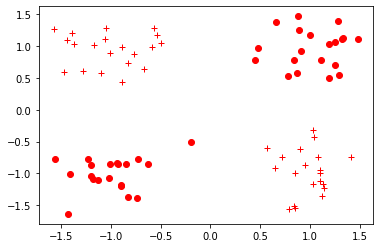

In [48]:
## 생성된 데이터셋 시각화 
def vis_data(x,y = None, c ='r'):
    if y is None:
        y = [None]*len(x)
    for x_,y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0],x_[1],'*',markerfacecolor='none',markeredgecolor = c)
            # markerfacecolor='none' 마커 내부 색은 nono
            #,markeredgecolor = c ='r'마커 윤곽선색은 빨강색 
        else:
            plt.plot(x_[0],x_[1],c+'o' if y_ == 0 else c+'+')
            #레이블이 0인 데이터는 점으로 (c+'o') 
            #1인 데이터는 +으로 표현 (c+'+')
               
plt.figure() 
vis_data(x_train,y_train,c='r') 
plt.show()

In [49]:
## 데이터셋을 파이토치 텐서로 변환 
x_train = torch.FloatTensor(x_train) 
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [36]:
## 신경망 모델 정의
class NeuralNet(torch.nn.Module):
    # 신경망은 보통 다음과 같이 신경망 모듈을 상속받는 파이썬 클래스로 정의
    def __init__ (self, input_size, hidden_size): 
        super(NeuralNet, self).__init__()
        #NeuralNet 크래스를 파이토치의 nn.Module 크래스의 속성들로 초기화 
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size,self.hidden_size)
        self.linear_2 = torch.nn.Linear(self.hidden_size,1)
        #활성화함수로서 relu() 와 sigmoid ()
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()

    #init() 함수에서 정의한 동작들을 차례대로 시행하는 forward 구현 
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        # relu는 입력값이 0보다 작으면 0을 0보다 크면 그대로 출력 
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [50]:
## 신경망 모델 생성 및 관련 변수와 알고리즘 정의 
model = NeuralNet(2,5)
#input_size : 2
#hidden_size : 5
learning_rate=0.03
criterion=torch.nn.BCELoss()
# 이차교차엔트로피 오차 함수를 사용 
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
# 최적화 알고리즘으로 확률적 경사하강법 사용 

In [51]:
## 학습 전 모델 성능 평가 
model.eval()
test_loss_before = criterion(model(x_test).squeeze(),y_test)
#squeeze 함수로 차원을 맞춘다. 
print('Before Training, test loss is{}'.format(test_loss_before.item()))

Before Training, test loss is0.692142128944397


In [55]:
## 신경망 학습
for each in range(epochs):
    model.train()
    # 학습한다. 
    optimizer.zero_grad()
    train_output=model(x_train)
    #결과값계싼 
    train_loss = criterion(train_output.squeeze(),y_train)
    #결과값의 차원을 레이블의 차원과 같게 만들고 오차를 계산한다. 
    if epochs % 100 == 0:
        print('Train loss at {} is {})'.format(epochs, train_loss.item()))
    #100 epoch 마다 오차를 출력해 학습이 잘 되는지 확인 
    train_loss.backward()
    optimizer.step()
    # 신경망의 핵심인 역전파를 행하는 코드


Train loss at 2000 is 0.6917605996131897)
Train loss at 2000 is 0.6912246942520142)
Train loss at 2000 is 0.6906763911247253)
Train loss at 2000 is 0.6901295781135559)
Train loss at 2000 is 0.6895847916603088)
Train loss at 2000 is 0.689041256904602)
Train loss at 2000 is 0.6884990334510803)
Train loss at 2000 is 0.6879564523696899)
Train loss at 2000 is 0.6874123811721802)
Train loss at 2000 is 0.6868693828582764)
Train loss at 2000 is 0.6863282322883606)
Train loss at 2000 is 0.685790479183197)
Train loss at 2000 is 0.6852535009384155)
Train loss at 2000 is 0.684717059135437)
Train loss at 2000 is 0.6841815114021301)
Train loss at 2000 is 0.6836470365524292)
Train loss at 2000 is 0.6831129193305969)
Train loss at 2000 is 0.6825787425041199)
Train loss at 2000 is 0.6820441484451294)
Train loss at 2000 is 0.6815086603164673)
Train loss at 2000 is 0.6809692978858948)
Train loss at 2000 is 0.6804224848747253)
Train loss at 2000 is 0.67987459897995)
Train loss at 2000 is 0.679326117038726

Train loss at 2000 is 0.45554009079933167)
Train loss at 2000 is 0.4545406401157379)
Train loss at 2000 is 0.45354214310646057)
Train loss at 2000 is 0.4525441527366638)
Train loss at 2000 is 0.45155295729637146)
Train loss at 2000 is 0.4505624771118164)
Train loss at 2000 is 0.4495725631713867)
Train loss at 2000 is 0.44858360290527344)
Train loss at 2000 is 0.44759517908096313)
Train loss at 2000 is 0.446607768535614)
Train loss at 2000 is 0.4456210136413574)
Train loss at 2000 is 0.4446350038051605)
Train loss at 2000 is 0.4436473846435547)
Train loss at 2000 is 0.4426611363887787)
Train loss at 2000 is 0.4416786730289459)
Train loss at 2000 is 0.4406971037387848)
Train loss at 2000 is 0.4397163987159729)
Train loss at 2000 is 0.4387362599372864)
Train loss at 2000 is 0.4377569556236267)
Train loss at 2000 is 0.43678075075149536)
Train loss at 2000 is 0.4358157515525818)
Train loss at 2000 is 0.4348514974117279)
Train loss at 2000 is 0.43388810753822327)
Train loss at 2000 is 0.4329

Train loss at 2000 is 0.22800853848457336)
Train loss at 2000 is 0.2275604009628296)
Train loss at 2000 is 0.2271134853363037)
Train loss at 2000 is 0.2266675978899002)
Train loss at 2000 is 0.22622275352478027)
Train loss at 2000 is 0.22577910125255585)
Train loss at 2000 is 0.22533643245697021)
Train loss at 2000 is 0.22489488124847412)
Train loss at 2000 is 0.22445432841777802)
Train loss at 2000 is 0.22401492297649384)
Train loss at 2000 is 0.22357654571533203)
Train loss at 2000 is 0.22313928604125977)
Train loss at 2000 is 0.2227030247449875)
Train loss at 2000 is 0.22226789593696594)
Train loss at 2000 is 0.22183378040790558)
Train loss at 2000 is 0.22140070796012878)
Train loss at 2000 is 0.22096867859363556)
Train loss at 2000 is 0.22053778171539307)
Train loss at 2000 is 0.22010771930217743)
Train loss at 2000 is 0.21967890858650208)
Train loss at 2000 is 0.21925106644630432)
Train loss at 2000 is 0.21882422268390656)
Train loss at 2000 is 0.21839845180511475)
Train loss at 2

Train loss at 2000 is 0.1373978555202484)
Train loss at 2000 is 0.13721227645874023)
Train loss at 2000 is 0.13702704012393951)
Train loss at 2000 is 0.13684222102165222)
Train loss at 2000 is 0.13665777444839478)
Train loss at 2000 is 0.13647374510765076)
Train loss at 2000 is 0.13629010319709778)
Train loss at 2000 is 0.13610678911209106)
Train loss at 2000 is 0.13592392206192017)
Train loss at 2000 is 0.1357414424419403)
Train loss at 2000 is 0.1355592906475067)
Train loss at 2000 is 0.13537763059139252)
Train loss at 2000 is 0.1351962685585022)
Train loss at 2000 is 0.1350153535604477)
Train loss at 2000 is 0.13483476638793945)
Train loss at 2000 is 0.13465455174446106)
Train loss at 2000 is 0.1344747245311737)
Train loss at 2000 is 0.13429535925388336)
Train loss at 2000 is 0.1341162621974945)
Train loss at 2000 is 0.13393758237361908)
Train loss at 2000 is 0.1337592899799347)
Train loss at 2000 is 0.13358138501644135)
Train loss at 2000 is 0.13340379297733307)
Train loss at 2000 

Train loss at 2000 is 0.09311329573392868)
Train loss at 2000 is 0.09301413595676422)
Train loss at 2000 is 0.0929151400923729)
Train loss at 2000 is 0.0928163081407547)
Train loss at 2000 is 0.09271761775016785)
Train loss at 2000 is 0.09261913597583771)
Train loss at 2000 is 0.0925208330154419)
Train loss at 2000 is 0.09242269396781921)
Train loss at 2000 is 0.09232470393180847)
Train loss at 2000 is 0.09222690016031265)
Train loss at 2000 is 0.09212929010391235)
Train loss at 2000 is 0.0920318216085434)
Train loss at 2000 is 0.09193453192710876)
Train loss at 2000 is 0.09183740615844727)
Train loss at 2000 is 0.0917404443025589)
Train loss at 2000 is 0.09164369106292725)
Train loss at 2000 is 0.09154705703258514)
Train loss at 2000 is 0.09145060181617737)
Train loss at 2000 is 0.09135432541370392)
Train loss at 2000 is 0.0912582129240036)
Train loss at 2000 is 0.09116226434707642)
Train loss at 2000 is 0.09106649458408356)
Train loss at 2000 is 0.09097086638212204)
Train loss at 200

Train loss at 2000 is 0.0684836134314537)
Train loss at 2000 is 0.0684259757399559)
Train loss at 2000 is 0.0683683529496193)
Train loss at 2000 is 0.06831122934818268)
Train loss at 2000 is 0.06825395673513412)
Train loss at 2000 is 0.06819675862789154)
Train loss at 2000 is 0.0681399255990982)
Train loss at 2000 is 0.06808282434940338)
Train loss at 2000 is 0.06802573800086975)
Train loss at 2000 is 0.06796915829181671)
Train loss at 2000 is 0.06791254132986069)
Train loss at 2000 is 0.06785570830106735)
Train loss at 2000 is 0.06779932975769043)
Train loss at 2000 is 0.06774282455444336)
Train loss at 2000 is 0.06768627464771271)
Train loss at 2000 is 0.06763030588626862)
Train loss at 2000 is 0.06757410615682602)
Train loss at 2000 is 0.06751780211925507)
Train loss at 2000 is 0.06746182590723038)
Train loss at 2000 is 0.06740596145391464)
Train loss at 2000 is 0.06735001504421234)
Train loss at 2000 is 0.06729428470134735)
Train loss at 2000 is 0.06723876297473907)
Train loss at 2

Train loss at 2000 is 0.055310457944869995)
Train loss at 2000 is 0.05527148395776749)
Train loss at 2000 is 0.05523255467414856)
Train loss at 2000 is 0.05519367381930351)
Train loss at 2000 is 0.055154867470264435)
Train loss at 2000 is 0.055116139352321625)
Train loss at 2000 is 0.05507741495966911)
Train loss at 2000 is 0.05503874272108078)
Train loss at 2000 is 0.05500010773539543)
Train loss at 2000 is 0.054961543530225754)
Train loss at 2000 is 0.054923005402088165)
Train loss at 2000 is 0.054884523153305054)
Train loss at 2000 is 0.054846085608005524)
Train loss at 2000 is 0.05480773001909256)
Train loss at 2000 is 0.054769366979599)
Train loss at 2000 is 0.05473107844591141)
Train loss at 2000 is 0.05469285324215889)
Train loss at 2000 is 0.054654646664857864)
Train loss at 2000 is 0.054616499692201614)
Train loss at 2000 is 0.054578423500061035)
Train loss at 2000 is 0.054540377110242844)
Train loss at 2000 is 0.05450240522623062)
Train loss at 2000 is 0.05446445196866989)
Tr

In [ ]:
## 학습 후 모델 성능 평가 
model.eval()
# 모델을 평가 모드로 바꾼다. 
test_loss = criterion(model(x_test).squeeze(),y_test)
# 오차를 구한다. 
print('After Training, test loss is {}'.format(test_loss.item()))

In [59]:
## 학습된 가중치 저장 
torch.save(model.state_dict(),'./model.pt')
# state_dict 함수는 모델 내 가중치들이 딕셔너리 형태로 
# {연산 이름 : 가중치 tensor와 편향 텐서}와 같이 표현된 데이터 ㅇ
print('state_dict format of the model :{}'.format(model.state_dict()))

state_dict format of the model :OrderedDict([('linear_1.weight', tensor([[-1.2386,  1.9057],
        [ 1.9393, -1.2525],
        [ 1.3676,  1.4545],
        [-0.3928,  0.5650],
        [ 0.4762,  0.6002]])), ('linear_1.bias', tensor([-0.0664, -0.1032, -0.2719, -0.0701, -0.1937])), ('linear_2.weight', tensor([[ 2.2172,  2.2906, -1.8664,  0.5956, -0.6157]])), ('linear_2.bias', tensor([-2.1046]))])


In [60]:
## 저장된 가중치를 불러와 새로운 모델에 적용 (전이 학습)
new_model = NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1,1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1,1]이 레이블 1을 가질 확률은 0.9947722554206848
